In [1]:
import warnings
warnings.filterwarnings('ignore')
import datetime
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

seed = 1

In [2]:
# Load the data
df = pd.read_csv('data.csv')

In [3]:
df.shape

(1234, 28)

In [4]:
df.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
1229,07.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1230,Male,Chennai,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
1230,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,Biosimiliars,Scheduled,Candidate 1231,Male,Chennai,...,Yes,Yes,Yes,Yes,Married,NaN,NaN,NaN,NaN,NaN
1231,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1232,Male,Chennai,...,Yes,Yes,Yes,Yes,Single,NaN,NaN,NaN,NaN,NaN
1232,06.05.2016,Pfizer,Pharmaceuticals,Chennai,Niche,generic drugs – RA,Scheduled,Candidate 1233,Female,Chennai,...,NaN,NaN,Uncertain,Yes,Single,NaN,NaN,NaN,NaN,NaN
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# We can see that the last row consists of all nulls, so remove that row
df.drop(1233, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1233 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

There are 5 columns namely Unnamed: 23, Unnamed: 24, Unnamed: 25, Unnamed: 26, Unnamed: 27 which have all null values, so remove these columns

In [8]:
df.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis=1, inplace=True)

In [9]:
df.describe()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
count,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1029,986,986,986,985,985,988,1228,1233,1233
unique,96,15,7,11,7,92,6,1233,2,10,...,7,7,5,6,8,7,12,7,8,2
top,06.02.2016,Standard Chartered Bank,BFSI,Chennai,Routine,JAVA/J2EE/Struts/Hibernate,Scheduled Walk In,Candidate 1033,Male,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
freq,220,904,949,754,1023,220,456,1,965,754,...,917,949,951,936,940,946,932,882,701,767


## Data cleaning

#### Cleaning the Date of Interview column

The dates are currently in date format, so need to convert them to datetime

In [10]:
def get_cleaned_date(date):
    """
    Rteurn datetime object from a string
    """
    date = date.strip()
    
    if '&' in date:
        date = date.split('&')[0].strip()
    
    cleaned_date = None
    
    # Since there are a lot of formats in the data, need to handle all the possible options
    date_formats = [
        '%d.%m.%Y', '%d.%m.%y', '%d.%m.%y', '%d-%m-%Y', '%d/%m/%y', '%d/%m/%Y', '%d %b %y', '%d-%b -%y',
        '%d – %b-%y', '%d -%b -%y'
    ]
    
    for date_format in date_formats:
        try:
            return datetime.datetime.strptime(date, date_format)
        except ValueError:
            pass

In [11]:
cleaned_interview_dates = df['Date of Interview'].apply(get_cleaned_date)

In [12]:
# Check the min and max dates to see if the dates have been converted properly

print(cleaned_interview_dates.min())
print(cleaned_interview_dates.max())

2014-03-18 00:00:00
2023-04-12 00:00:00


Looks like there's some incorrect data present. Inspect the dates sorted in reverse order.

In [13]:
cleaned_interview_dates.sort_values(ascending=False)[:10]

444   2023-04-12
443   2022-04-12
442   2021-04-12
441   2020-04-12
440   2019-04-12
439   2018-04-12
438   2017-04-12
228   2016-12-04
176   2016-12-04
170   2016-12-04
Name: Date of Interview, dtype: datetime64[ns]

The date in indices 438-444 is incorrect, change the year to 2016 in each of them

In [14]:
df.iloc[438:445, :]['Date of Interview'] = '12.04.2016'

In [15]:
# Apply the function again, and check the min and max dates now
cleaned_interview_dates = df['Date of Interview'].apply(get_cleaned_date)
print(cleaned_interview_dates.min())
print(cleaned_interview_dates.max())

2014-03-18 00:00:00
2016-12-04 00:00:00


In [16]:
# Since the data looks fine now, replace the column with this new Series
df['Date of Interview'] = cleaned_interview_dates

#### Cleaning the Client name column

In [17]:
df['Client name'].value_counts()

Standard Chartered Bank            904
Hospira                             75
Pfizer                              75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Standard Chartered Bank Chennai     17
Prodapt                             17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client name, dtype: int64

In [18]:
# Some clients are written in different names, so combine them
replace_dict = {
    'Standard Chartered Bank Chennai': 'Standard Chartered Bank',
    'Hewitt': 'Aon Hewitt',
    'Aon hewitt Gurgaon': 'Aon Hewitt'
}
df['Client name'].replace(replace_dict, inplace=True)

In [19]:
df['Client name'].value_counts()

Standard Chartered Bank    921
Hospira                     75
Pfizer                      75
Aon Hewitt                  50
Flextronics                 23
ANZ                         22
UST                         18
Prodapt                     17
Astrazeneca                 15
Williams Lea                11
Barclays                     5
Woori Bank                   1
Name: Client name, dtype: int64

Club those client names which have count < 50 into a single category called "Others"

In [20]:
def merge_categories(column_name, threshold, merged_name='Others'):
    """
    Will merge those categories which have count below a certain threshold
    """
    column_counts = df[column_name].value_counts()
    to_merge = column_counts[column_counts < threshold].index
    df.loc[df[column_name].isin(to_merge), column_name] = merged_name

In [21]:
merge_categories('Client name', 50)
df['Client name'].value_counts()

Standard Chartered Bank    921
Others                     112
Hospira                     75
Pfizer                      75
Aon Hewitt                  50
Name: Client name, dtype: int64

#### Cleaning the Industry column

In [22]:
df['Industry'].value_counts()

BFSI                        949
Pharmaceuticals             165
IT Products and Services     45
Electronics                  23
IT Services                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64

In [23]:
merge_categories('Industry', 50, 'IT')
df['Industry'].value_counts()

BFSI               949
Pharmaceuticals    165
IT                 119
Name: Industry, dtype: int64

#### Cleaning the Position to be closed column

In [24]:
df['Position to be closed'].value_counts()

Routine                1023
Niche                   163
Dot Net                  18
Trade Finance            11
AML                       8
Production- Sterile       5
Selenium testing          5
Name: Position to be closed, dtype: int64

In [25]:
replace_dict = {
    'Dot Net': 'Routine',
    'Trade Finance': 'Niche',
    'AML': 'Niche',
    'Selenium testing': 'Routine',
    'Production- Sterile': 'Routine'
}
df['Position to be closed'].replace(replace_dict, inplace=True)

#### Cleaning the Nature of Skillset column

In [26]:
df['Nature of Skillset'].value_counts()

JAVA/J2EE/Struts/Hibernate                220
Accounting Operations                      86
Fresher                                    86
AML/KYC/CDD                                84
CDD KYC                                    52
Routine                                    47
Oracle                                     43
JAVA/SPRING/HIBERNATE/JSF                  42
Java J2EE                                  33
SAS                                        27
Java Developer                             25
Oracle Plsql                               25
Lending and Liabilities                    22
Banking Operations                         22
Java                                       21
Core Java                                  17
Java J2ee                                  16
Senior software engineer-Mednet            15
ALS Testing                                15
T-24 developer                             15
SCCM                                       14
COTS Developer                    

In [27]:
nature_of_skillset = df['Nature of Skillset']

def clean_nature_of_skillset(x):
    x = x.lower()
    if 'java' in x:
        return 'java'
    elif 'oracle' in x:
        return 'oracle'
    elif 'testing' in x:
        return 'testing'
    elif 'aml' in x or 'kyc' in x or 'cdd' in x:
        return 'cdd'
    else:
        return x

In [28]:
cleaned_nature_of_skillset = nature_of_skillset.apply(clean_nature_of_skillset)
cleaned_nature_of_skillset.value_counts()

java                                      459
cdd                                       136
accounting operations                      86
fresher                                    86
oracle                                     68
routine                                    47
testing                                    39
sas                                        27
lending and liabilities                    25
banking operations                         24
senior software engineer-mednet            15
t-24 developer                             15
sccm                                       15
cots developer                             13
analytical r & d                           13
regulatory                                 12
hadoop                                     12
ra publishing                               9
publishing                                  9
dot net                                     9
etl                                         9
production                        

In [29]:
df['Nature of Skillset'] = cleaned_nature_of_skillset
merge_categories('Nature of Skillset', 50)
df['Nature of Skillset'].value_counts()

java                     459
Others                   398
cdd                      136
fresher                   86
accounting operations     86
oracle                    68
Name: Nature of Skillset, dtype: int64

#### Cleaning the Interview Type column

In [30]:
df['Interview Type'].value_counts()

Scheduled Walk In    456
Scheduled            371
Walkin               189
Scheduled Walkin     189
Walkin                27
Sceduled walkin        1
Name: Interview Type, dtype: int64

In [31]:
replace_dict = {
    'Scheduled Walk In': 'Scheduled Walkin',
    'Sceduled walkin': 'Scheduled Walkin',
    'Walkin ': 'Walkin'
}
df['Interview Type'].replace(replace_dict, inplace=True)

#### Cleaning the location columns

In [32]:
location_columns = [
    'Candidate Current Location', 'Candidate Job Location', 'Interview Venue',
    'Candidate Native location'
]

def clean_location(s):
    s = s.translate(str.maketrans({key: None for key in string.punctuation})) # remove punctuations
    s = s.lower().strip()
    
    if 'delhi' in s or 'ncr' in s or 'gurgaon' in s or 'noida' in s:
        return 'ncr'
    else:
        return s
    
for col in location_columns:
    df[col] = df[col].apply(clean_location)

Create 2 new columns denoting if the interview location is same the current location or native location

In [33]:
df['interview_venue_same_as_current_location'] = df['Candidate Current Location'] == df['Interview Venue']
df['interview_venue_same_as_native_location'] = df['Candidate Native location'] == df['Interview Venue']

In [34]:
merge_categories('Candidate Current Location', 35)
merge_categories('Interview Venue', 35)
merge_categories('Candidate Native location', 40)

#### Cleaning the question columns

In [35]:
# Rename the long question columns

columns_rename_dict = {
    'Have you obtained the necessary permission to start at the required time': 'question_obtained_necessary_permission',
    'Hope there will be no unscheduled meetings': 'question_no_unscheduled_meetings',
    'Can I Call you three hours before the interview and follow up on your attendance for the interview': 'question_can_follow_up',
    'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much': 'question_alternate_number',
    'Have you taken a printout of your updated resume. Have you read the JD and understood the same': 'question_taken_printout',
    'Are you clear with the venue details and the landmark.': 'question_clear_with_venue_details',
    'Has the call letter been shared': 'question_call_letter_shared'
}
df.rename(columns=columns_rename_dict, inplace=True)

In [36]:
question_columns = [col for col in df.columns if col.startswith('question')]

def clean_question_answers(a):
    yes_answers = ['yes']
    not_known_answers = ['cant say', 'yet to confirm', 'need to check', 'na', 'not sure']
    no_answers = [
        'no', 'no- i need to check', 'not yet', 'no i have only thi number', 'no dont', 'havent checked',
        'yet to check', 'no- will take it soon'
    ]
    
    if pd.isna(a):
        return 'not_known'
    
    a = a.lower().strip()
    if a in yes_answers:
        return 'yes'
    elif a in not_known_answers:
        return 'not_known'
    elif a in no_answers:
        return 'no'

for col in question_columns:
    df[col] = df[col].apply(clean_question_answers)

#### Cleaning the Attendance columns

In [37]:
df['Expected Attendance'].value_counts()

Yes          882
Uncertain    250
No            59
NO            34
11:00 AM       1
yes            1
10.30 Am       1
Name: Expected Attendance, dtype: int64

In [38]:
def clean_expected_attendance(x):
    yes_list = ['yes', '11:00 am', '10.30 am']
    not_known_list = ['uncertain']
    no_list = ['no']
    
    if pd.isna(x):
        return 'not_known'
    
    x = x.lower().strip()
    if x in yes_list:
        return 'yes'
    elif x in not_known_list:
        return 'not_known'
    elif x in no_list:
        return 'no'

df['Expected Attendance'] = df['Expected Attendance'].apply(clean_expected_attendance)

In [39]:
df['Observed Attendance'] = df['Observed Attendance'].apply(lambda x: x.lower().strip())
df['Observed Attendance'].value_counts()

yes    783
no     450
Name: Observed Attendance, dtype: int64

In [40]:
# Create new columns for interview date, month and day of week

df['interview_date'] = df['Date of Interview'].apply(lambda x: x.day)
df['interview_month'] = df['Date of Interview'].apply(lambda x: x.month)
df['interview_day'] = df['Date of Interview'].apply(lambda x: x.dayofweek)

## EDA

In [41]:
sns.set(rc={'figure.figsize': (9, 6)})
sns.set_style('white')

In [42]:
df['Observed Attendance'].replace({'no': 0, 'yes': 1}, inplace=True)

In [43]:
def plot_categorical_column(column_name):
    f, (ax1, ax2) = plt.subplots(2, figsize=(9, 12))
    sns.countplot(x=column_name, data=df, ax=ax1)
    sns.pointplot(x=column_name, y='Observed Attendance', data=df, ax=ax2)

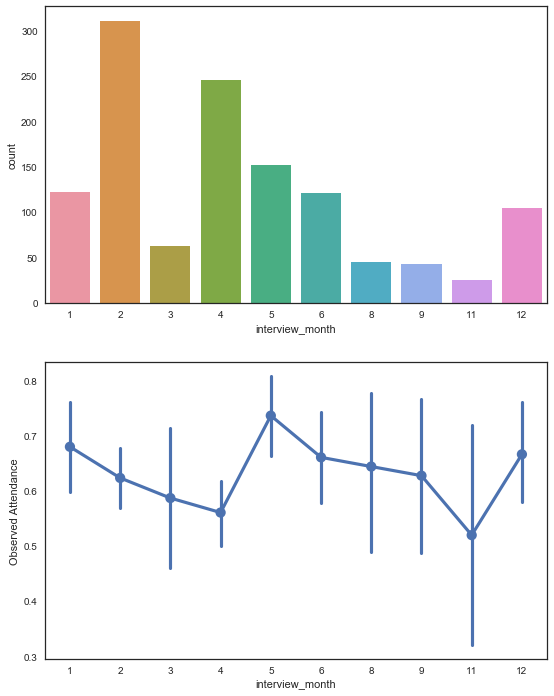

In [44]:
plot_categorical_column('interview_month')

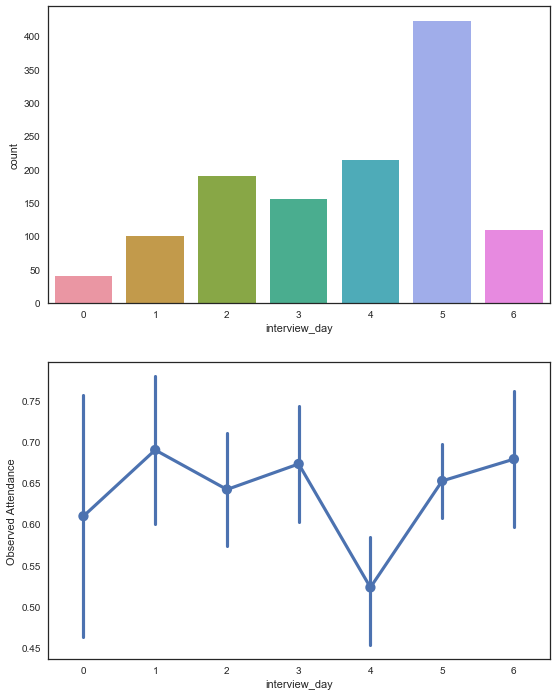

In [45]:
plot_categorical_column('interview_day')

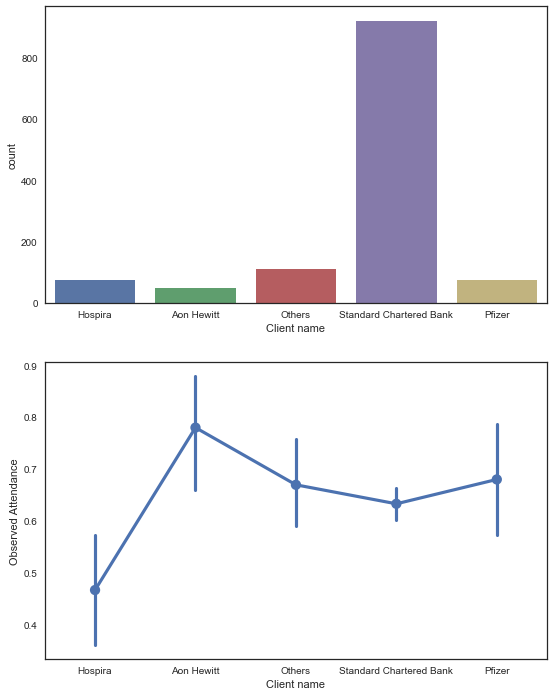

In [46]:
plot_categorical_column('Client name')

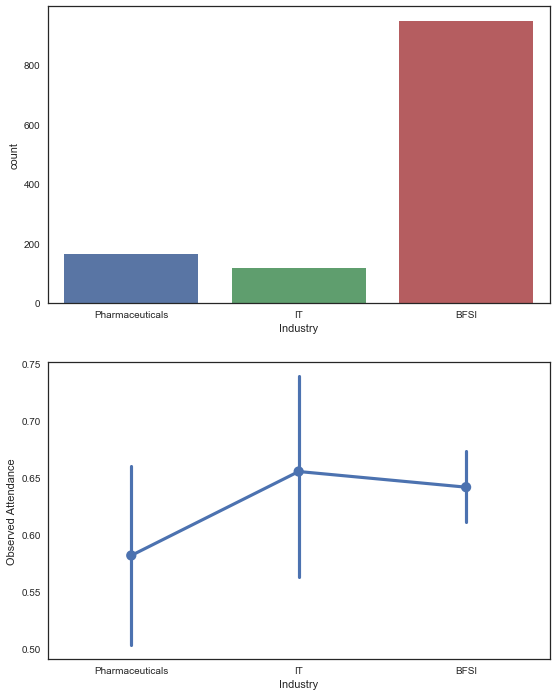

In [47]:
plot_categorical_column('Industry')

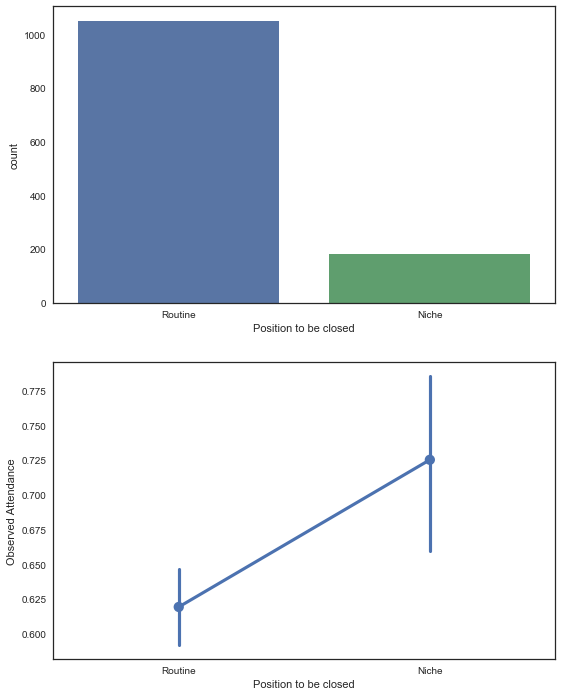

In [48]:
plot_categorical_column('Position to be closed')

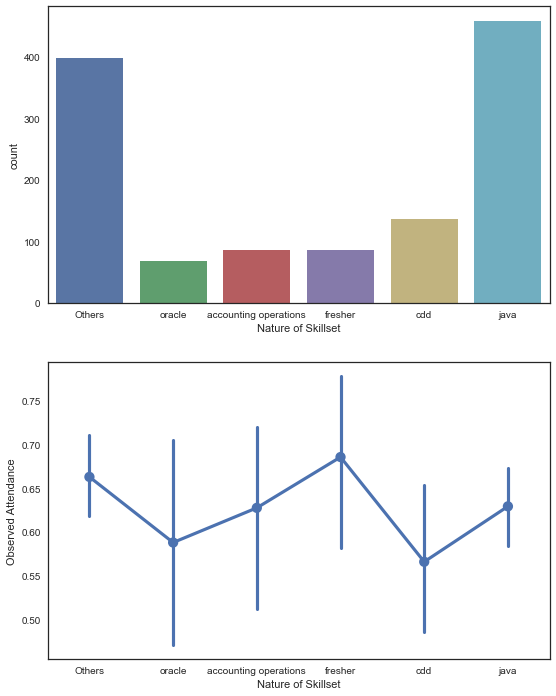

In [49]:
plot_categorical_column('Nature of Skillset')

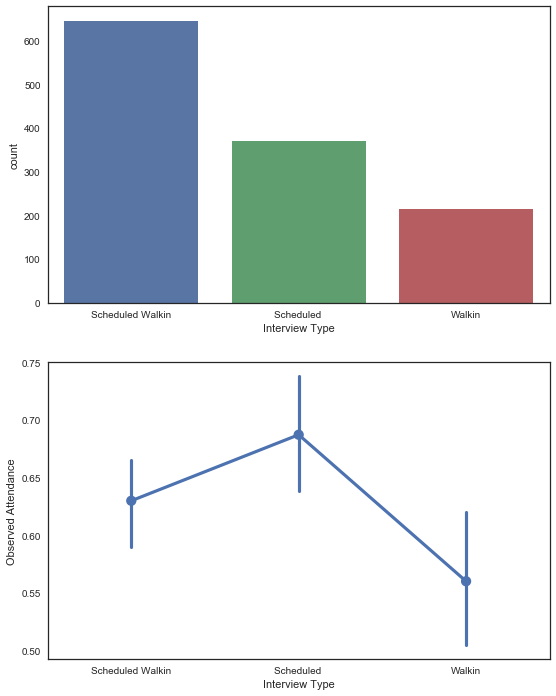

In [50]:
plot_categorical_column('Interview Type')

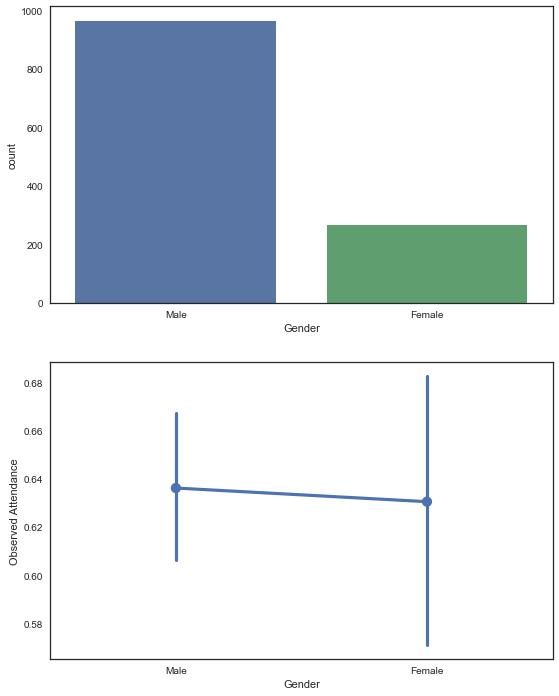

In [51]:
plot_categorical_column('Gender')

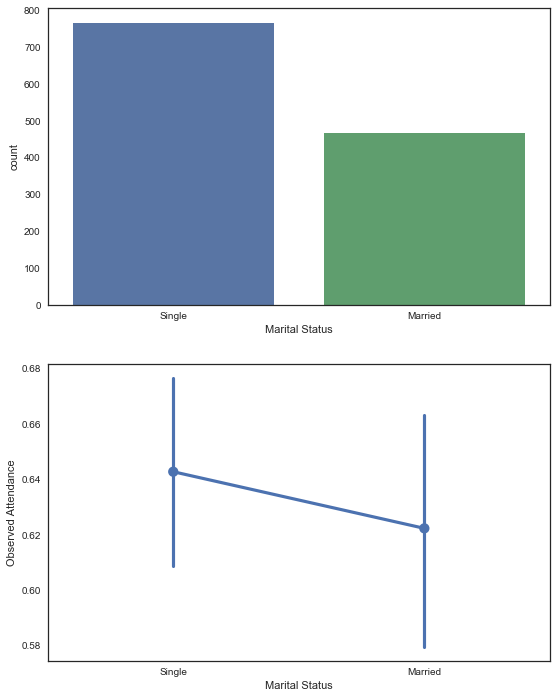

In [52]:
plot_categorical_column('Marital Status')

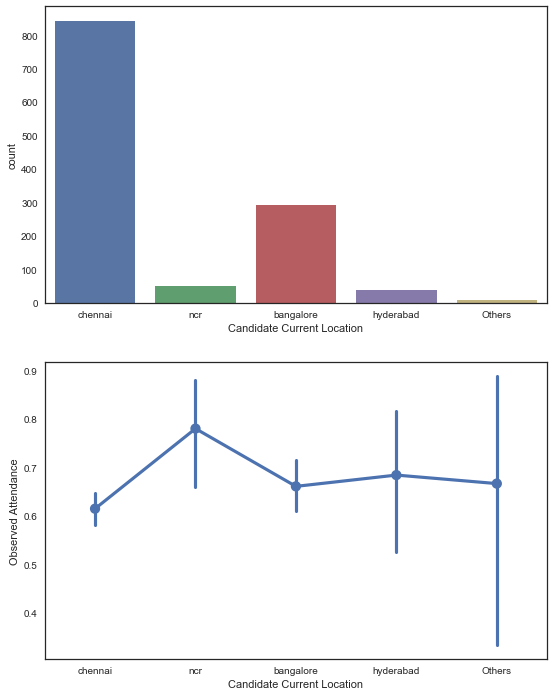

In [53]:
plot_categorical_column('Candidate Current Location')

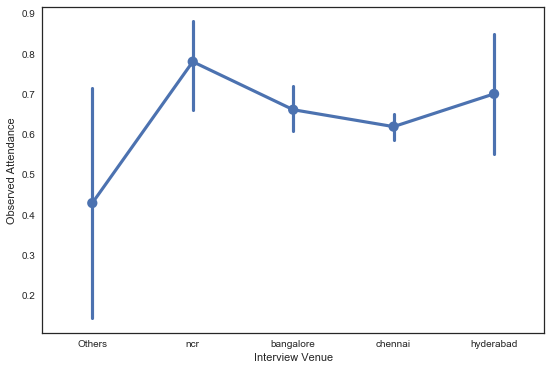

In [54]:
sns.pointplot(x='Interview Venue', y='Observed Attendance', data=df)

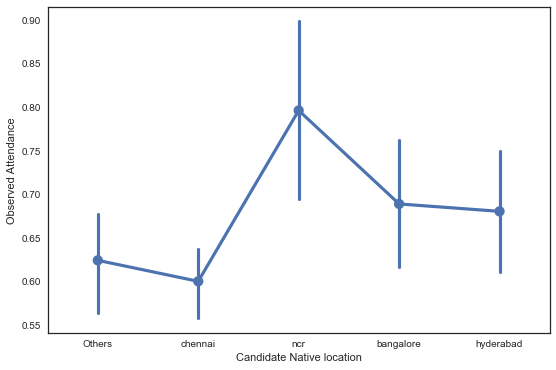

In [55]:
sns.pointplot(x='Candidate Native location', y='Observed Attendance', data=df)

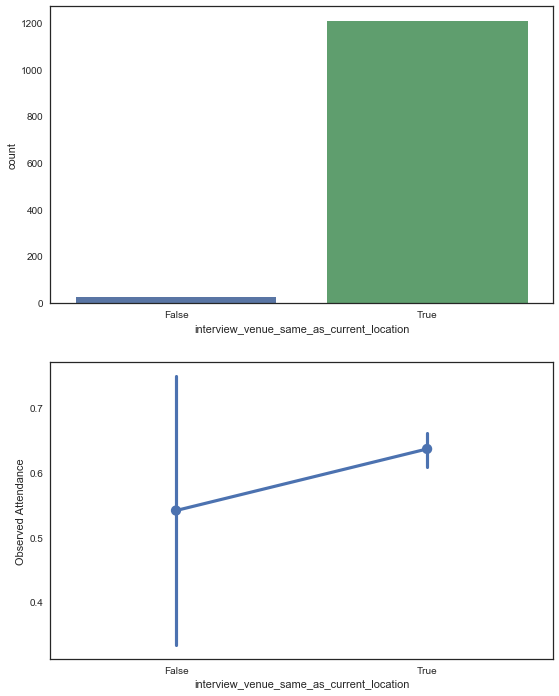

In [56]:
plot_categorical_column('interview_venue_same_as_current_location')

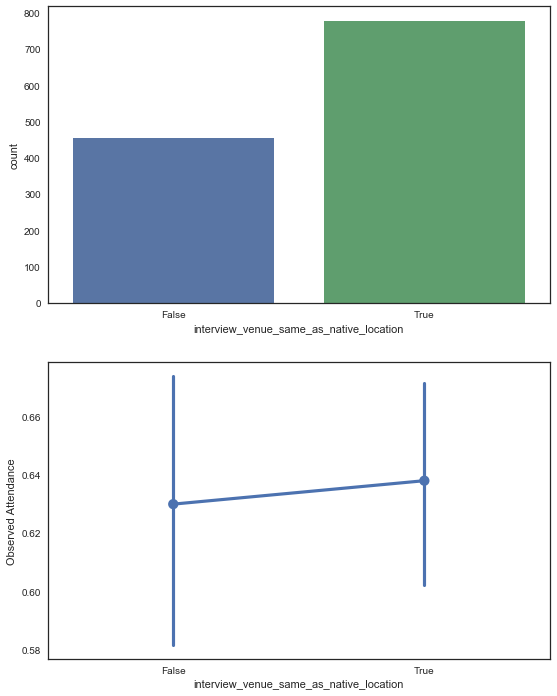

In [57]:
plot_categorical_column('interview_venue_same_as_native_location')

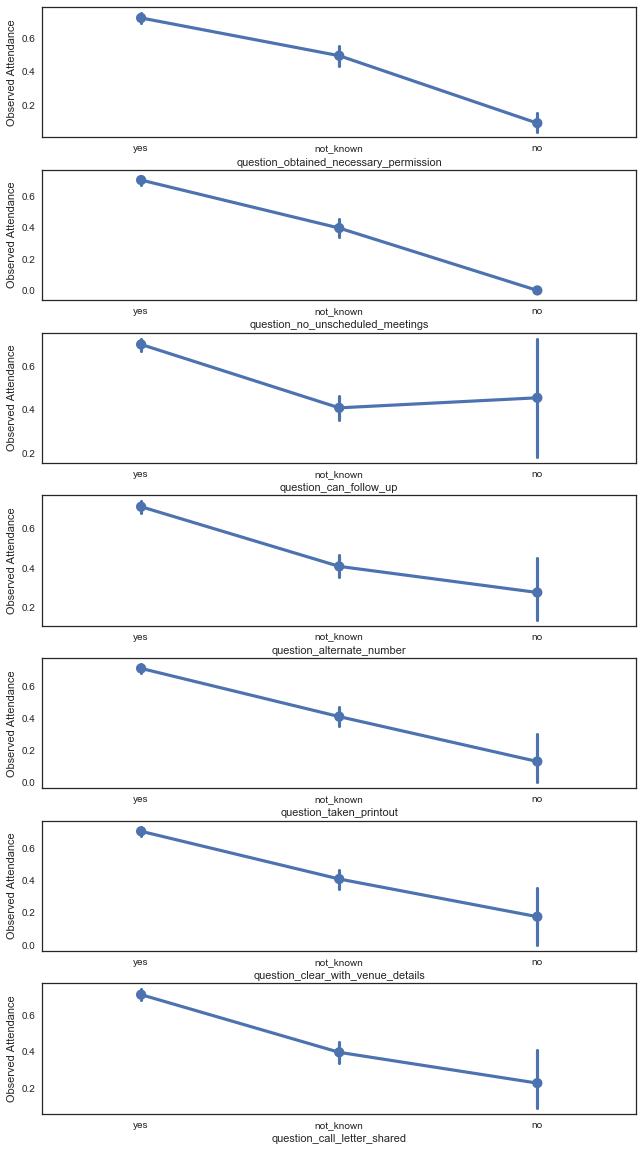

In [58]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(9, 16))
f.tight_layout()
axes = {
    'ax1': ax1,
    'ax2': ax2,
    'ax3': ax3,
    'ax4': ax4,
    'ax5': ax5,
    'ax6': ax6,
    'ax7': ax7
}
for ctr, col in enumerate(question_columns):
    ax_number = 'ax%s' % (ctr+1)
    sns.pointplot(x=col, y='Observed Attendance', data=df, ax=axes[ax_number])

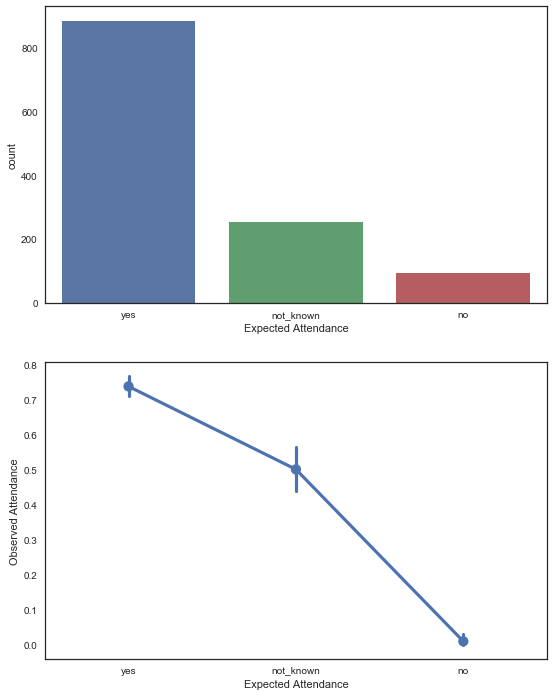

In [59]:
plot_categorical_column('Expected Attendance')

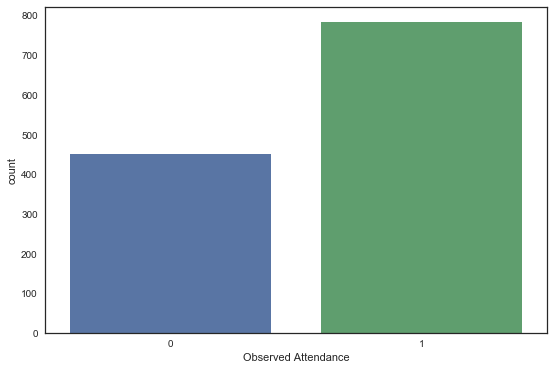

In [60]:
sns.countplot(x='Observed Attendance', data=df)

## Modeling

### Create dummies, new features

In [61]:
unrequired_columns = [
    'Date of Interview', 'Location', 'Name(Cand ID)', 'Candidate Job Location',
]
df.drop(unrequired_columns, axis=1, inplace=True)

In [62]:
# Create dummy variables for the categorical columns

categorical_columns = [
    'Client name', 'Industry', 'Nature of Skillset', 'Interview Type', 'Candidate Current Location',
    'Interview Venue', 'Candidate Native location', 'Expected Attendance'
]
categorical_columns += question_columns
for categorical_column in categorical_columns:
    dummy_df = pd.get_dummies(df[categorical_column], prefix=categorical_column)
    df = pd.concat([df, dummy_df], axis=1)
    df.drop([categorical_column], axis=1, inplace=True)

In [63]:
# replace binary text values with numbers

binary_columns_replace_dict = {
    'Position to be closed': {
        'Routine': 0,
        'Niche': 1
    },
    'Gender': {
        'Female': 0,
        'Male': 1
    },
    'interview_venue_same_as_current_location': {
        False: 0,
        True: 1
    },
    'interview_venue_same_as_native_location': {
        False: 0,
        True: 1
    },
    'Marital Status': {
        'Single': 0,
        'Married': 1
    },
}

binary_columns = [
    'Position to be closed', 'Gender', 'interview_venue_same_as_current_location',
    'interview_venue_same_as_native_location', 'Marital Status'
]
for binary_col in binary_columns_replace_dict:
    df[binary_col].replace(binary_columns_replace_dict[binary_col], inplace=True)

In [64]:
# We can see in the pointplots that, observed attendance is low in months of March and April and high in May.
# This could be because the salary hike takes place in these months, so people tend not to take leaves from
# current company during this period and switch after taking increment.

df['month_march_or_april'] = df['interview_month'].apply(lambda x: 1 if x in [3, 4] else 0)
df['month_may'] = df['interview_month'].apply(lambda x: 1 if x == 5 else 0)

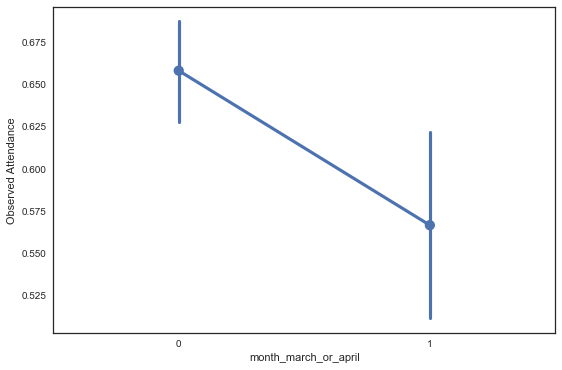

In [65]:
sns.pointplot(x='month_march_or_april', y='Observed Attendance', data=df)

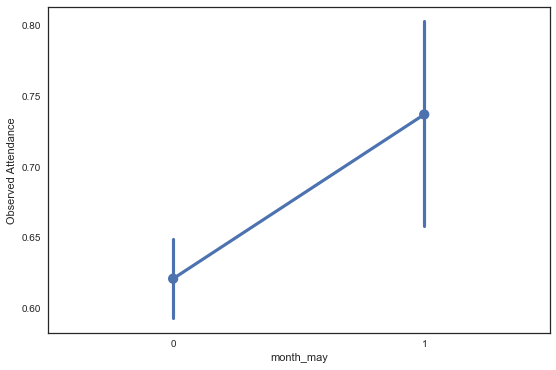

In [66]:
sns.pointplot(x='month_may', y='Observed Attendance', data=df)

In [67]:
# People prefer going for interviews on weekends, as they don't have to take a leave from office.

df['is_weekend'] = df['interview_day'].apply(lambda x: 1 if x in [5, 6] else 0)

In [68]:
# Also, we can see from plots that attendance is quite low on fridays, so create a feature for that also
df['day_friday'] = df['interview_day'].apply(lambda x: 1 if x == 4 else 0)

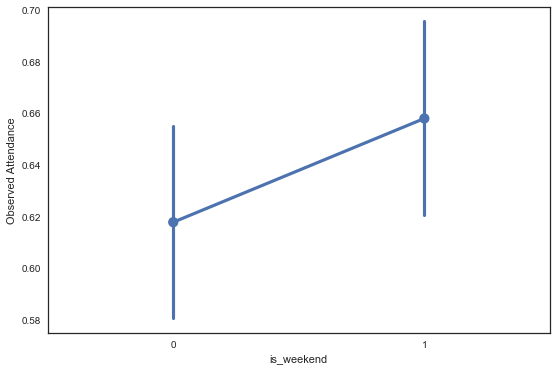

In [69]:
sns.pointplot(x='is_weekend', y='Observed Attendance', data=df)

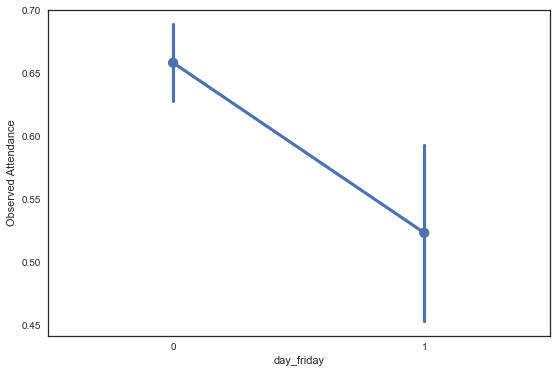

In [70]:
sns.pointplot(x='day_friday', y='Observed Attendance', data=df)

In [71]:
# There are 7 columns which are in a column form and all of them have 3 possible answers: yes, not_known and no.
# Instead of keeping all the 7 columns, we can create a single column by assigning weights to answers.

df['questions_score'] = (df['question_obtained_necessary_permission_not_known']*0.5) + \
(df['question_obtained_necessary_permission_yes']*1) + \
(df['question_no_unscheduled_meetings_not_known']*0.5) + \
(df['question_no_unscheduled_meetings_yes']*1) + \
(df['question_can_follow_up_not_known']*0.5) + \
(df['question_can_follow_up_yes']*1) + \
(df['question_alternate_number_not_known']*0.5) + \
(df['question_alternate_number_yes']*1) + \
(df['question_taken_printout_not_known']*0.5) + \
(df['question_taken_printout_yes']*1) + \
(df['question_clear_with_venue_details_not_known']*0.5) + \
(df['question_clear_with_venue_details_yes']*1) + \
(df['question_call_letter_shared_not_known']*0.5) + \
(df['question_call_letter_shared_yes']*1)

In [72]:
target_variable = 'Observed Attendance'
exclude_list = [
    'Observed Attendance',
    'question_obtained_necessary_permission_no',
    'question_obtained_necessary_permission_not_known',
    'question_obtained_necessary_permission_yes',
    'question_no_unscheduled_meetings_no',
    'question_no_unscheduled_meetings_not_known',
    'question_no_unscheduled_meetings_yes', 'question_can_follow_up_no',
    'question_can_follow_up_not_known', 'question_can_follow_up_yes',
    'question_alternate_number_no', 'question_alternate_number_not_known',
    'question_alternate_number_yes', 'question_taken_printout_no',
    'question_taken_printout_not_known', 'question_taken_printout_yes',
    'question_clear_with_venue_details_no',
    'question_clear_with_venue_details_not_known',
    'question_clear_with_venue_details_yes',
    'question_call_letter_shared_no',
    'question_call_letter_shared_not_known',
    'question_call_letter_shared_yes'
]
features = [x for x in df.columns if x not in exclude_list]

In [73]:
# Scale the data using min max scaling

scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[features]))
scaled_df.columns = features
scaled_df[target_variable] = df[target_variable]

In [74]:
def evaluate_models(features):
    results = {}
    models = [
        ('lr', LogisticRegression(random_state=seed)),
        ('lda', LinearDiscriminantAnalysis()),
        ('svm', SVC(random_state=seed)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('nb', GaussianNB()),
        ('dt', DecisionTreeClassifier(random_state=seed)),
        ('rf', RandomForestClassifier(random_state=seed, n_estimators=100)),
        ('et', ExtraTreesClassifier(random_state=seed, n_estimators=100)),
    ]

    for model_name, model in models:
        # Since data size is not too big, we'll get 1/6th of data for testing
        cross_val_scores = cross_val_score(model, scaled_df[features], scaled_df[target_variable], cv=6)
        results[model_name] = (model, cross_val_scores.mean())
        
    sorted_results = sorted(results.items(), key=lambda x: x[1][1], reverse=True)
    for model_name, (model, accuracy) in sorted_results:
        print(model_name, accuracy)
        
    return results

In [75]:
results_using_all_features = evaluate_models(features)

svm 0.6991041124003473
lr 0.6893480148393717
lda 0.6852829741889653
rf 0.665818138763912
et 0.6593338069303024
nb 0.658615518194017
knn 0.6365853658536585
dt 0.6236719551661536


We see that using all features gives us an accuracy of 69.58% using SVM.
But we can see that from the plots above that not all features are useful, so create a custom list of features according to the plots plotted above.

In [76]:
reduced_features = [
    'questions_score', 'Position to be closed', 'month_may', 'month_march_or_april', 'day_friday',
    'Interview Type_Walkin', 'Expected Attendance_no', 'Expected Attendance_yes',
    'Interview Type_Scheduled ', 'Candidate Current Location_hyderabad'
]

In [77]:
results_using_reduced_features = evaluate_models(reduced_features)

nb 0.7169429315652379
lda 0.7063738258741811
lr 0.7047557028968349
svm 0.7031612597679374
rf 0.6934130554897782
et 0.6926158339253295
dt 0.6893598547635961
knn 0.6244810166548268


### Final accuracy: 71.69% using Naive Bayes